<a href="https://colab.research.google.com/github/221230055/Wega-ramadhan-Pengantar-ML/blob/main/project-week/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [ ]:
import pandas as pd

train_df = pd.read_csv("/content/fashion-mnist_train.csv")
test_df  = pd.read_csv("/content/fashion-mnist_test.csv")

train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


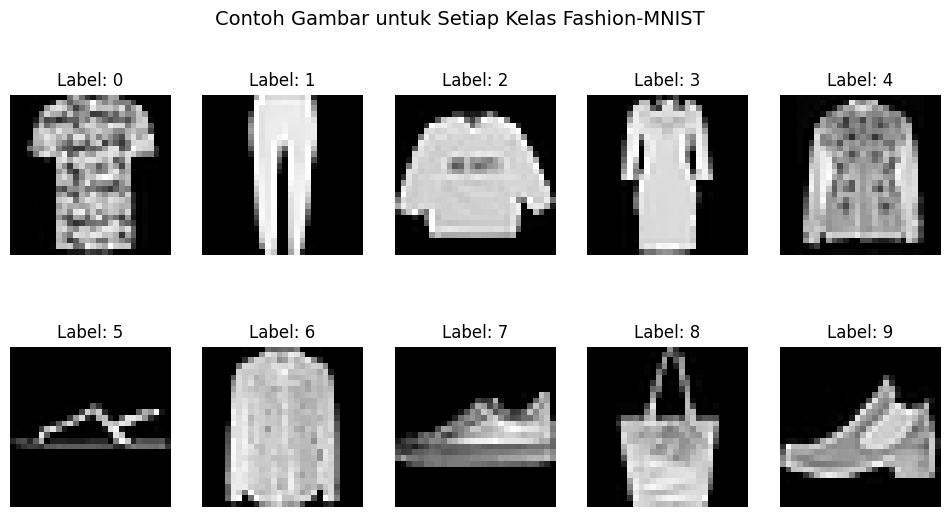

In [ ]:
plt.figure(figsize=(12,6))

for label in range(10):
    idx = train_df[train_df['label'] == label].index[0]
    img = train_df.loc[idx].iloc[1:].values.reshape(28,28)

    plt.subplot(2,5,label+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {label}")
    plt.axis("off")

plt.suptitle("Contoh Gambar untuk Setiap Kelas Fashion-MNIST", fontsize=14)
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
              label        pixel1        pixel2        pixel3        pixel4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       4.500000      0.000900      0.006150      0.035333      0.101933   
std        2.872305      0.094689      0.271011      1.222324      2.452871   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000     16.000000     36.000000    226.000000    164.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  60000.000000  60000.000000  60000.00000

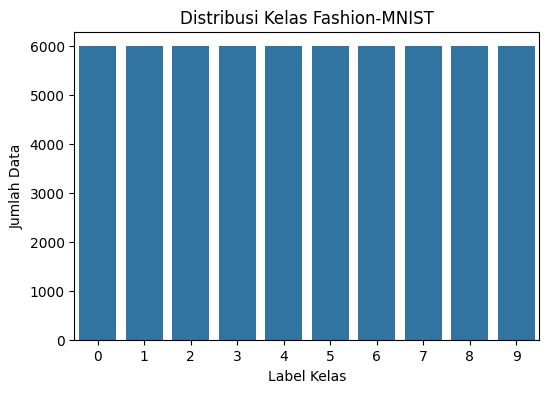

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# =========================
# 1. INFO & DESKRIPSI DATA
# =========================
print(train_df.info())
print(train_df.describe())

# =========================
# 2. DISTRIBUSI KELAS
# =========================
plt.figure(figsize=(6,4))
sns.countplot(x=train_df['label'])
plt.title("Distribusi Kelas Fashion-MNIST")
plt.xlabel("Label Kelas")
plt.ylabel("Jumlah Data")
plt.show()




In [ ]:
X_train = train_df.iloc[:,1:].values / 255.0
y_train = train_df.iloc[:,0].values

X_test = test_df.iloc[:,1:].values / 255.0
y_test = test_df.iloc[:,0].values

# Untuk ML & MLP
X_train_flat = X_train
X_test_flat = X_test

# Untuk CNN
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train)

y_pred_rf = rf.predict(X_test_flat)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy Random Forest:", acc_rf)


Accuracy Random Forest: 0.8846


In [ ]:
mlp = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_mlp = mlp.fit(
    X_train_flat, y_train_cat,
    validation_data=(X_test_flat, y_test_cat),
    epochs=20,
    batch_size=128
)

mlp_loss, mlp_acc = mlp.evaluate(X_test_flat, y_test_cat)
print("Accuracy MLP (3 hidden layer):", mlp_acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7702 - loss: 0.6520 - val_accuracy: 0.8640 - val_loss: 0.3752
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8661 - loss: 0.3709 - val_accuracy: 0.8731 - val_loss: 0.3430
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8807 - loss: 0.3211 - val_accuracy: 0.8421 - val_loss: 0.4153
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8850 - loss: 0.3104 - val_accuracy: 0.8883 - val_loss: 0.2973
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8970 - loss: 0.2763 - val_accuracy: 0.8859 - val_loss: 0.3145
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9021 - loss: 0.2609 - val_accuracy: 0.8832 - val_loss: 0.3136
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9052 - loss: 0.2542 - val_accuracy: 0.8912 - val_loss: 0.3018
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9100 - loss: 0.2404 - val_accu

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_cnn = cnn.fit(
    X_train_cnn, y_train_cat,
    validation_data=(X_test_cnn, y_test_cat),
    epochs=25,
    batch_size=128,
    callbacks=[early_stop]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 167ms/step - accuracy: 0.6296 - loss: 1.1164 - val_accuracy: 0.6991 - val_loss: 0.8476
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 166ms/step - accuracy: 0.8120 - loss: 0.5188 - val_accuracy: 0.8632 - val_loss: 0.3623
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 168ms/step - accuracy: 0.8364 - loss: 0.4505 - val_accuracy: 0.8664 - val_loss: 0.3500
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 167ms/step - accuracy: 0.8493 - loss: 0.4134 - val_accuracy: 0.8848 - val_loss: 0.3067
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 167ms/step - accuracy: 0.8600 - loss: 0.3801 - val_accuracy: 0.8834 - val_loss: 0.3062
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 170ms/step - accuracy: 0.8654 - loss: 0.3657 - val_accuracy: 0.8912 - val_loss: 0.2906
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 167ms/step - accuracy: 0.8714 - loss: 0.3550 - val_accuracy: 0.8928 - val_loss: 0.2852
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 173ms/step - accuracy: 0.8741 - loss: 0

In [ ]:
cnn_loss, cnn_acc = cnn.evaluate(X_test_cnn, y_test_cat)
print("Accuracy CNN:", cnn_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8965 - loss: 0.2756
Accuracy CNN: 0.9000999927520752


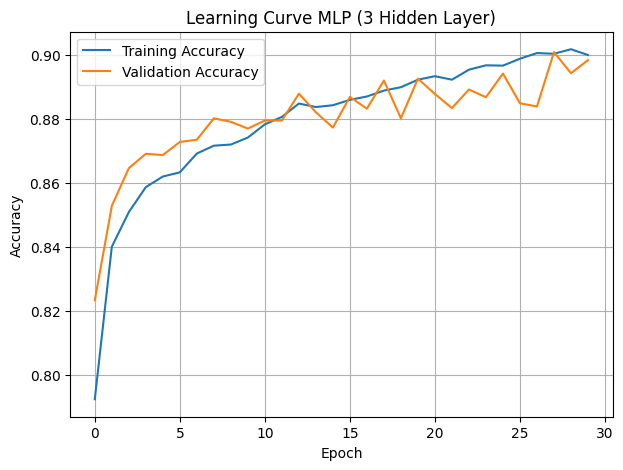

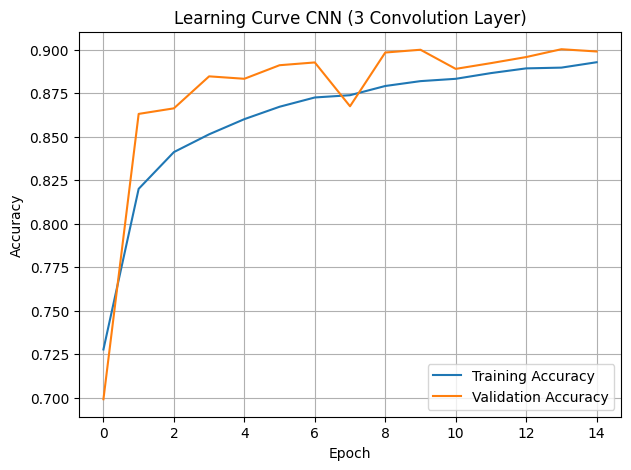

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')
plt.title("Learning Curve MLP (3 Hidden Layer)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7,5))
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Learning Curve CNN (3 Convolution Layer)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Model terbaik berdasarkan accuracy: CNN (3 Conv Layer)
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


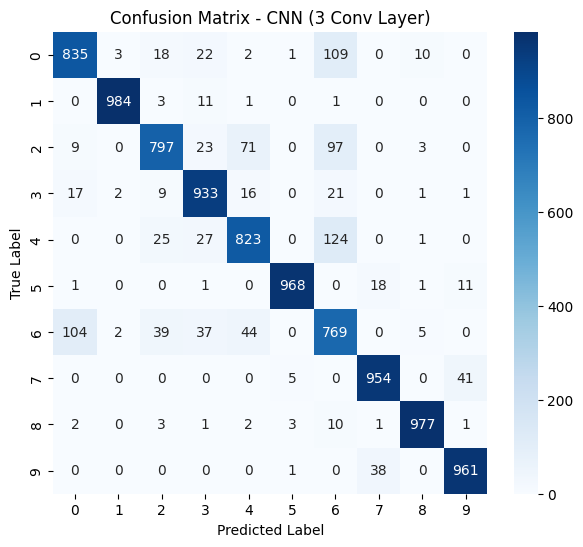

In [ ]:
acc_models = {
    "Random Forest": acc_rf,
    "MLP (3 Hidden Layer)": mlp_acc,
    "CNN (3 Conv Layer)": cnn_acc
}

best_model = max(acc_models, key=acc_models.get)
print("Model terbaik berdasarkan accuracy:", best_model)

if best_model == "Random Forest":
    y_best = y_pred_rf
elif best_model == "MLP (3 Hidden Layer)":
    y_best = np.argmax(mlp.predict(X_test_flat), axis=1)
else:
    y_best = np.argmax(cnn.predict(X_test_cnn), axis=1)

cm = confusion_matrix(y_test, y_best)

plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix - {best_model}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
result_df = pd.DataFrame({
    "Model": ["Random Forest", "MLP (3 Hidden Layer)", "CNN (3 Conv Layer)"],
    "Accuracy": [acc_rf, mlp_acc, cnn_acc]
})

result_df


,Model,Accuracy
0,Random Forest,0.8846
1,MLP (3 Hidden Layer),0.8972
2,CNN (3 Conv Layer),0.9001


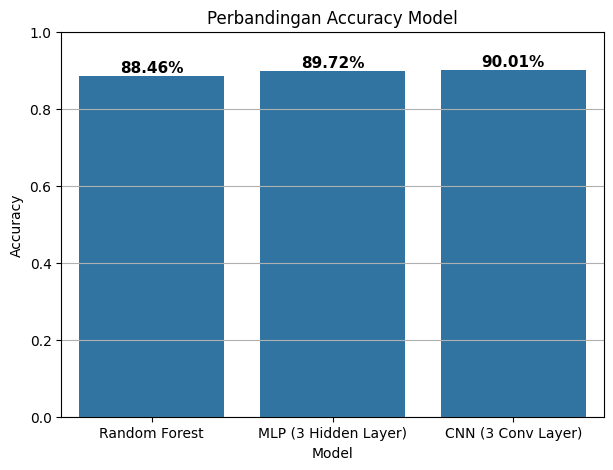

In [ ]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x="Model", y="Accuracy", data=result_df)
plt.ylim(0,1)
plt.title("Perbandingan Accuracy Model")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.grid(axis='y')

# Tambahkan persentase di atas batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
            height + 0.01,
            f"{height*100:.2f}%",
            ha="center", fontsize=11, fontweight="bold")

plt.show()
